In [1]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 32.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=11f06620ef29086d587a811055941abf21593c3270506c873046619d801bf334
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import math
import matplotlib.pyplot as plt


In [10]:
ticker_list=['AMD','CHGG','NVDA'] #name of stock
today = date.today()
print(today)
start_date="2020-10-11"
print(start_date)
end_date="2021-10-11"
files=[]
def getData(ticker):
  print(ticker)
  data = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
  dataname= ticker+'_'+str(end_date)
  files.append(dataname)
  SaveData(data, dataname)
def SaveData(df, filename): #save file
  df.to_csv('./data/'+filename+'.csv')
for tik in ticker_list:
  getData(tik)
for i in range(0,3):
  df1= pd.read_csv('./data/'+ str(files[i])+'.csv')
  print(df1.head())

2021-11-07
2020-10-11
AMD
[*********************100%***********************]  1 of 1 completed
CHGG
[*********************100%***********************]  1 of 1 completed
NVDA
[*********************100%***********************]  1 of 1 completed
         Date       Open       High        Low      Close  Adj Close    Volume
0  2020-10-12  83.650002  85.129997  83.120003  84.290001  84.290001  47669700
1  2020-10-13  84.860001  86.089996  83.970001  85.279999  85.279999  42764100
2  2020-10-14  85.860001  85.959999  83.459999  84.209999  84.209999  40403000
3  2020-10-15  83.400002  84.720001  82.419998  83.129997  83.129997  33696400
4  2020-10-16  83.540001  83.989998  82.410004  83.169998  83.169998  31474300
         Date       Open       High        Low      Close  Adj Close   Volume
0  2020-10-12  82.419998  83.160004  81.230003  82.849998  82.849998  1437500
1  2020-10-13  83.470001  86.230003  83.110001  85.839996  85.839996  2436300
2  2020-10-14  85.220001  86.000000  83.199997  8

         Date       Open       High        Low      Close  Adj Close    Volume
0  2020-10-12  83.650002  85.129997  83.120003  84.290001  84.290001  47669700
1  2020-10-13  84.860001  86.089996  83.970001  85.279999  85.279999  42764100
2  2020-10-14  85.860001  85.959999  83.459999  84.209999  84.209999  40403000
3  2020-10-15  83.400002  84.720001  82.419998  83.129997  83.129997  33696400
4  2020-10-16  83.540001  83.989998  82.410004  83.169998  83.169998  31474300


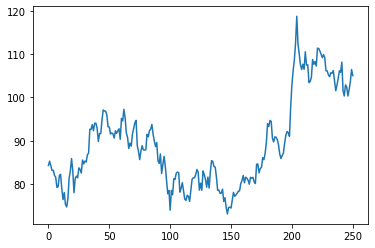

In [11]:
df = pd.read_csv('./data/'+'AMD_2021-10-11'+'.csv')
print(df.head())
df['Close'].plot()


In [12]:
change_column = - df["Open"] + df["Close"]
print(change_column)
df.insert(7, "Change", change_column)
print(df.head())

0      0.639999
1      0.419998
2     -1.650002
3     -0.270004
4     -0.370003
         ...   
246   -1.400002
247    0.889999
248    3.190002
249    1.849998
250   -1.490005
Length: 251, dtype: float64
         Date       Open       High  ...  Adj Close    Volume    Change
0  2020-10-12  83.650002  85.129997  ...  84.290001  47669700  0.639999
1  2020-10-13  84.860001  86.089996  ...  85.279999  42764100  0.419998
2  2020-10-14  85.860001  85.959999  ...  84.209999  40403000 -1.650002
3  2020-10-15  83.400002  84.720001  ...  83.129997  33696400 -0.270004
4  2020-10-16  83.540001  83.989998  ...  83.169998  31474300 -0.370003

[5 rows x 8 columns]


In [13]:
for i in range(0,251):
  if change_column[i] > 0: change_column[i]=int(1)
  elif change_column[i]<0: change_column[i]=int(2)
  elif change_column[i]==0: change_column[i]=int(3)
df.insert(8, "Type", change_column)
print(df.head())

         Date       Open       High  ...    Volume    Change  Type
0  2020-10-12  83.650002  85.129997  ...  47669700  0.639999   1.0
1  2020-10-13  84.860001  86.089996  ...  42764100  0.419998   1.0
2  2020-10-14  85.860001  85.959999  ...  40403000 -1.650002   2.0
3  2020-10-15  83.400002  84.720001  ...  33696400 -0.270004   2.0
4  2020-10-16  83.540001  83.989998  ...  31474300 -0.370003   2.0

[5 rows x 9 columns]


In [14]:
print(df['Type'])

0      1.0
1      1.0
2      2.0
3      2.0
4      2.0
      ... 
246    2.0
247    1.0
248    1.0
249    1.0
250    2.0
Name: Type, Length: 251, dtype: float64


In [15]:
print(df.head())


         Date       Open       High  ...    Volume    Change  Type
0  2020-10-12  83.650002  85.129997  ...  47669700  0.639999   1.0
1  2020-10-13  84.860001  86.089996  ...  42764100  0.419998   1.0
2  2020-10-14  85.860001  85.959999  ...  40403000 -1.650002   2.0
3  2020-10-15  83.400002  84.720001  ...  33696400 -0.270004   2.0
4  2020-10-16  83.540001  83.989998  ...  31474300 -0.370003   2.0

[5 rows x 9 columns]


         Date       Open       High        Low      Close  Adj Close   Volume
0  2020-10-12  82.419998  83.160004  81.230003  82.849998  82.849998  1437500
1  2020-10-13  83.470001  86.230003  83.110001  85.839996  85.839996  2436300
2  2020-10-14  85.220001  86.000000  83.199997  84.000000  84.000000  1580100
3  2020-10-15  82.750000  84.580002  81.910004  84.059998  84.059998  1650200
4  2020-10-16  85.199997  85.930000  84.339996  84.389999  84.389999  1289400


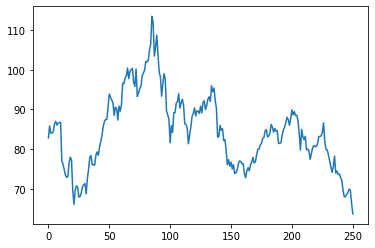

In [16]:
df2 = pd.read_csv('./data/'+'CHGG_2021-10-11'+'.csv')
print(df2.head())
df2['Close'].plot()

In [17]:
change_column2 = - df2["Open"] + df2["Close"]
print(change_column2)
df2.insert(7, "Change", change_column2)
print(df2.head())

0      0.430000
1      2.369995
2     -1.220001
3      1.309998
4     -0.809998
         ...   
246    0.720001
247    0.479996
248   -0.020004
249   -2.080002
250   -2.880005
Length: 251, dtype: float64
         Date       Open       High  ...  Adj Close   Volume    Change
0  2020-10-12  82.419998  83.160004  ...  82.849998  1437500  0.430000
1  2020-10-13  83.470001  86.230003  ...  85.839996  2436300  2.369995
2  2020-10-14  85.220001  86.000000  ...  84.000000  1580100 -1.220001
3  2020-10-15  82.750000  84.580002  ...  84.059998  1650200  1.309998
4  2020-10-16  85.199997  85.930000  ...  84.389999  1289400 -0.809998

[5 rows x 8 columns]


In [18]:
for i in range(0,251):
  if change_column2[i] > 0: change_column2[i]=int(1)
  elif change_column2[i]<0: change_column2[i]=int(2)
  elif change_column2[i]==0: change_column2[i]=int(3)
df2.insert(8, "Type", change_column2)
print(df2.head())

         Date       Open       High  ...   Volume    Change  Type
0  2020-10-12  82.419998  83.160004  ...  1437500  0.430000   1.0
1  2020-10-13  83.470001  86.230003  ...  2436300  2.369995   1.0
2  2020-10-14  85.220001  86.000000  ...  1580100 -1.220001   2.0
3  2020-10-15  82.750000  84.580002  ...  1650200  1.309998   1.0
4  2020-10-16  85.199997  85.930000  ...  1289400 -0.809998   2.0

[5 rows x 9 columns]


         Date        Open        High  ...       Close   Adj Close    Volume
0  2020-10-12  139.895004  143.470001  ...  142.259995  142.111267  43474400
1  2020-10-13  142.964996  143.485001  ...  142.482498  142.333542  34460400
2  2020-10-14  142.904999  143.427505  ...  140.952499  140.805145  27610000
3  2020-10-15  138.107498  140.057495  ...  139.699997  139.553955  26722400
4  2020-10-16  140.367493  141.214996  ...  138.115005  137.970627  24239200

[5 rows x 7 columns]


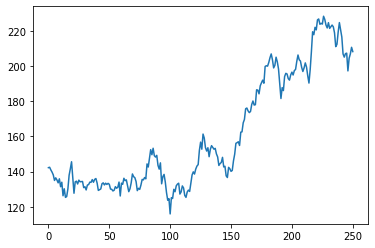

In [19]:
df3 = pd.read_csv('./data/'+'NVDA_2021-10-11'+'.csv')
print(df3.head())
df3['Close'].plot()

In [20]:
change_column3 = - df3["Open"] + df3["Close"]
print(change_column3)
df3.insert(7, "Change", change_column3)
print(df3.head())

0      2.364990
1     -0.482498
2     -1.952499
3      1.592499
4     -2.252487
         ...   
246   -7.719986
247    5.009995
248    5.800003
249   -0.169998
250   -2.699997
Length: 251, dtype: float64
         Date        Open        High  ...   Adj Close    Volume    Change
0  2020-10-12  139.895004  143.470001  ...  142.111267  43474400  2.364990
1  2020-10-13  142.964996  143.485001  ...  142.333542  34460400 -0.482498
2  2020-10-14  142.904999  143.427505  ...  140.805145  27610000 -1.952499
3  2020-10-15  138.107498  140.057495  ...  139.553955  26722400  1.592499
4  2020-10-16  140.367493  141.214996  ...  137.970627  24239200 -2.252487

[5 rows x 8 columns]


In [21]:
for i in range(0,251):
  if change_column3[i] > 0: change_column3[i]=int(1)
  elif change_column3[i]<0: change_column3[i]=int(2)
  elif change_column3[i]==0: change_column3[i]=int(3)
df3.insert(8, "Type", change_column3)
print(df3.head())

         Date        Open        High  ...    Volume    Change  Type
0  2020-10-12  139.895004  143.470001  ...  43474400  2.364990   1.0
1  2020-10-13  142.964996  143.485001  ...  34460400 -0.482498   2.0
2  2020-10-14  142.904999  143.427505  ...  27610000 -1.952499   2.0
3  2020-10-15  138.107498  140.057495  ...  26722400  1.592499   1.0
4  2020-10-16  140.367493  141.214996  ...  24239200 -2.252487   2.0

[5 rows x 9 columns]


In [22]:
df.to_csv('./data/'+'AMD_dataprocessing'+'.csv')
df2.to_csv('./data/'+'CHGG_dataprocessing'+'.csv')
df3.to_csv('./data/'+'NVDA_dataprocessing'+'.csv')


